In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_path='C:/Users/anton/Documents/Master2/Memoire/Scripts/tp_since_1892/Precip_Uccle_1892.csv'
df=pd.read_csv(df_path,delimiter=',')
df['DAY'] = pd.to_datetime(df['DAY'])
df['year'] = df['DAY'].dt.to_period('Y')
df['year_month']=df['DAY'].dt.to_period('M')
df['month']=df['DAY'].dt.month
df.head()   

,DAY,PRECIP_QUANTITY,year,year_month,month
0,1892-01-01,1.94,1892,1892-01,1
1,1892-01-02,0.49,1892,1892-01,1
2,1892-01-03,0.00,1892,1892-01,1
3,1892-01-04,0.00,1892,1892-01,1
4,1892-01-05,0.87,1892,1892-01,1


In [3]:
#I want to regroup the years from september first to august 31st

tp_first_8_months = df[df['month']<9].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()
tp_last_4_months = df[df['month']>8].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()

tp_first_8_months['year']=tp_first_8_months['year']
tp_last_4_months['year']=tp_last_4_months['year']+1

tp_seasonal_year = pd.merge(tp_first_8_months,tp_last_4_months, on='year', how='inner')
tp_seasonal_year['TP']=tp_seasonal_year['PRECIP_QUANTITY_x']+tp_seasonal_year['PRECIP_QUANTITY_y']

tp_seasonal_year.head()
#I want a new colomn with 'year-1/year' to have the year of the season. For example 1892-1893 is the season of 1893
tp_seasonal_year['season']=(tp_seasonal_year['year']-1).astype(str)+'-'+(tp_seasonal_year['year']).astype(str)
tp_seasonal_year.head()



,year,PRECIP_QUANTITY_x,PRECIP_QUANTITY_y,TP,season
0,1893,372.86,281.48,654.34,1892-1893
1,1894,500.11,283.52,783.63,1893-1894
2,1895,521.08,342.29,863.37,1894-1895
3,1896,396.22,291.21,687.43,1895-1896
4,1897,555.48,350.89,906.37,1896-1897


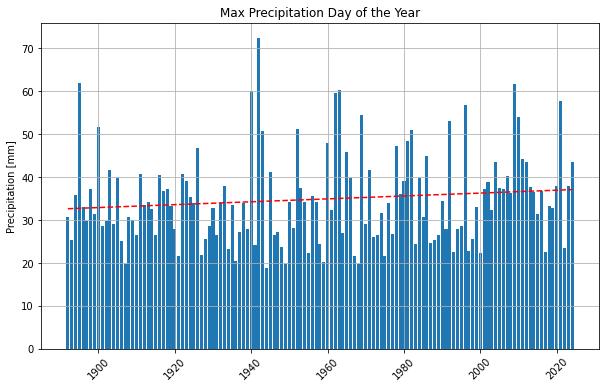

48402   2024-07-09
Name: DAY, dtype: datetime64[ns]


In [7]:
#find the maximum day of precipitation for every year
max_day = df.groupby('year')['PRECIP_QUANTITY'].idxmax()
max_precipitation = df.loc[max_day]

plt.figure(figsize=(10, 6))
plt.bar(max_precipitation['year'].astype(int)+1970, max_precipitation['PRECIP_QUANTITY'], label='Max Precipitation')
plt.ylabel('Precipitation [mm]')
plt.title('Max Precipitation Day of the Year')
plt.grid()

z = np.polyfit(max_precipitation['year'].astype(int)+1970, max_precipitation['PRECIP_QUANTITY'], 1)
p = np.poly1d(z)
plt.plot(max_precipitation['year'].astype(int)+1970, p(max_precipitation['year'].astype(int)+1970), "r--", label='Trendline')
plt.xticks(rotation=45)
plt.show()
print(max_precipitation[max_precipitation['year']=='2024']['DAY'])
